Author: Ifrah Zeb

Email: ifrah_zeb@outlook.com

Date: 22/08/2021

In this notebook I will create a sample of the cleaned data, perform EDA and feature engineering, model my final dataset, and evaluate the models.

## 1. Loading Libraries and Dataset

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Read in the data
df= pd.read_csv('Data/capstone_eda.csv', index_col= False)

In [3]:
# Check the shape of the data
df.shape

(7340207, 23)

There are 23 columns and 7,340, 207 rows in the dataframe.

In [4]:
# Check the head of the dataframe
df.head()

,Unnamed: 0,STARFIRE_INCIDENT_ID,INCIDENT_DATETIME,ALARM_BOX_LOCATION,INCIDENT_BOROUGH,ZIPCODE,ALARM_SOURCE_DESCRIPTION_TX,ALARM_LEVEL_INDEX_DESCRIPTION,HIGHEST_ALARM_LEVEL,INCIDENT_CLASSIFICATION,...,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
0,0,5.001279e+14,01/01/2005 12:00:01 AM,MERRYMOUNT ST & NOME AVE,RICHMOND / STATEN ISLAND,10314.0,Phone,Initial Alarm,First Alarm,Carbon Monoxide - Code 1 - Investigation,...,01/01/2005 12:00:56 AM,01/01/2005 12:06:38 AM,01/01/2005 12:15:56 AM,N,Y,397,357,1,1,0
1,1,5.001331e+14,01/01/2005 12:00:03 AM,ARTHUR AVE & 183 ST,BRONX,10458.0,PD Link/Medical,DEFAULT RECORD,First Alarm,Medical MFA - PD Link,...,01/01/2005 12:01:51 AM,01/01/2005 12:04:23 AM,01/01/2005 12:07:03 AM,N,Y,260,250,1,0,0
2,2,5.001036e+14,01/01/2005 12:01:02 AM,TOMPKINS & PARK AVES,BROOKLYN,11206.0,PD Link/Medical,Initial Alarm,First Alarm,Medical - Assist Civilian,...,01/01/2005 12:01:25 AM,01/01/2005 12:03:28 AM,01/01/2005 12:13:20 AM,N,Y,146,139,1,0,0
3,3,5.001752e+14,01/01/2005 12:01:42 AM,ASTORIA BLVD AND 2ND ST,QUEENS,11102.0,Phone,DEFAULT RECORD,First Alarm,Non-Medical MFA - Phone,...,01/01/2005 12:02:51 AM,01/01/2005 12:07:09 AM,01/01/2005 12:08:27 AM,N,Y,327,275,3,2,1
4,4,5.001716e+14,01/01/2005 12:01:45 AM,JACKSON & 42 RD,QUEENS,11101.0,Private Fire Alarm,Initial Alarm,First Alarm,Sprinkler System - Working on System,...,01/01/2005 12:04:12 AM,01/01/2005 12:08:16 AM,01/01/2005 12:24:37 AM,N,Y,391,279,1,1,1


In [5]:
# There is an 'Unnamed: 0' column which was the previous index that I am now going to drop
df=df.drop(['Unnamed: 0'],axis=1)

In [6]:
# Check the column has been dropped with .info() and also view the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7340207 entries, 0 to 7340206
Data columns (total 22 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   STARFIRE_INCIDENT_ID            float64
 1   INCIDENT_DATETIME               object 
 2   ALARM_BOX_LOCATION              object 
 3   INCIDENT_BOROUGH                object 
 4   ZIPCODE                         float64
 5   ALARM_SOURCE_DESCRIPTION_TX     object 
 6   ALARM_LEVEL_INDEX_DESCRIPTION   object 
 7   HIGHEST_ALARM_LEVEL             object 
 8   INCIDENT_CLASSIFICATION         object 
 9   INCIDENT_CLASSIFICATION_GROUP   object 
 10  DISPATCH_RESPONSE_SECONDS_QY    int64  
 11  FIRST_ASSIGNMENT_DATETIME       object 
 12  FIRST_ACTIVATION_DATETIME       object 
 13  FIRST_ON_SCENE_DATETIME         object 
 14  INCIDENT_CLOSE_DATETIME         object 
 15  VALID_DISPATCH_RSPNS_TIME_INDC  object 
 16  VALID_INCIDENT_RSPNS_TIME_INDC  object 
 17  INCIDENT_RESPONSE_SECONDS_Q

In [7]:
# Reset the index 
df=df.reset_index()

In [8]:
# Create a copy of the dataframe to then take a 10% sample
df2 = df.copy()

In [9]:
# Get a 10% sample of the dataframe in a random sample state
df2 = df2.sample(frac=.1, replace=True, random_state=1)

In [10]:
# Check dataframe
df2.head()

,index,STARFIRE_INCIDENT_ID,INCIDENT_DATETIME,ALARM_BOX_LOCATION,INCIDENT_BOROUGH,ZIPCODE,ALARM_SOURCE_DESCRIPTION_TX,ALARM_LEVEL_INDEX_DESCRIPTION,HIGHEST_ALARM_LEVEL,INCIDENT_CLASSIFICATION,...,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
4322341,4322341,1.431849e+15,11/14/2014 05:03:30 AM,AMBOY RD & MAIN ST,RICHMOND / STATEN ISLAND,10307.0,UCT/911,Initial Alarm,First Alarm,Carbon Monoxide - Code 1 - Investigation,...,11/14/2014 05:04:46 AM,11/14/2014 05:09:15 AM,11/14/2014 05:18:27 AM,N,Y,345,286,1,1,0
4686059,4686059,1.522210e+15,08/10/2015 04:38:11 PM,TARGEE ST & BALTIC AVE,RICHMOND / STATEN ISLAND,10304.0,EMS Link/Medical,Initial Alarm,First Alarm,Medical - Assist Civilian,...,08/10/2015 04:38:35 PM,08/10/2015 04:39:44 PM,08/10/2015 04:57:28 PM,N,Y,93,83,1,0,0
6762380,6762380,1.936425e+15,12/30/2019 04:25:38 PM,LONGFELLOW AVE & 165 ST,BRONX,10459.0,Phone,Initial Alarm,First Alarm,Utility Emergency - Steam,...,12/30/2019 04:26:27 PM,12/30/2019 04:32:41 PM,12/30/2019 04:46:49 PM,N,Y,423,387,0,1,0
3937352,3937352,1.400814e+15,01/08/2014 08:13:36 AM,PLEASANT AVE & 120 ST,MANHATTAN,10035.0,Phone,Initial Alarm,First Alarm,Assist Civilian - Non-Medical,...,01/08/2014 08:14:30 AM,01/08/2014 08:22:42 AM,01/08/2014 08:34:49 AM,N,Y,546,518,0,1,0
491263,491263,6.049091e+14,02/18/2006 09:05:46 PM,TROY AVE & HERKIMER ST,BROOKLYN,11213.0,PD Link/Medical,Initial Alarm,First Alarm,Medical - PD Link 10-91,...,02/18/2006 09:06:08 PM,02/18/2006 09:09:28 PM,02/18/2006 09:14:08 PM,N,Y,222,216,1,0,0


In [11]:
# Check df2 shape
df2.shape

(734021, 23)

There are now 22 columns and 734, 021 rows in the dataframe. This is correct (having dropped a column) and it is 10% of the previous row number (7,340, 207).

## 2. Transpose dataframe for duplicates

In [12]:
# Transpose the dataset to check for duplicates on the sample dataset
# I was unable to do so with the original dataset (too large and computationally expensive)
df2.T.duplicated()

index                             False
STARFIRE_INCIDENT_ID              False
INCIDENT_DATETIME                 False
ALARM_BOX_LOCATION                False
INCIDENT_BOROUGH                  False
ZIPCODE                           False
ALARM_SOURCE_DESCRIPTION_TX       False
ALARM_LEVEL_INDEX_DESCRIPTION     False
HIGHEST_ALARM_LEVEL               False
INCIDENT_CLASSIFICATION           False
INCIDENT_CLASSIFICATION_GROUP     False
DISPATCH_RESPONSE_SECONDS_QY      False
FIRST_ASSIGNMENT_DATETIME         False
FIRST_ACTIVATION_DATETIME         False
FIRST_ON_SCENE_DATETIME           False
INCIDENT_CLOSE_DATETIME           False
VALID_DISPATCH_RSPNS_TIME_INDC    False
VALID_INCIDENT_RSPNS_TIME_INDC    False
INCIDENT_RESPONSE_SECONDS_QY      False
INCIDENT_TRAVEL_TM_SECONDS_QY     False
ENGINES_ASSIGNED_QUANTITY         False
LADDERS_ASSIGNED_QUANTITY         False
OTHER_UNITS_ASSIGNED_QUANTITY     False
dtype: bool

I can see that there are no duplicates in the transposed data so I can move on safely knowing so.

The datetime columns are once again objects, so I will convert them to datetime data types.

## 3. Converting dates to datetime data type

In [13]:
# Convert first date time column from object
df2['INCIDENT_DATETIME'] =  pd.to_datetime(df2['INCIDENT_DATETIME'].astype('datetime64[ns]'))

In [14]:
# Check it worked
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734021 entries, 4322341 to 2244469
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   index                           734021 non-null  int64         
 1   STARFIRE_INCIDENT_ID            734021 non-null  float64       
 2   INCIDENT_DATETIME               734021 non-null  datetime64[ns]
 3   ALARM_BOX_LOCATION              734021 non-null  object        
 4   INCIDENT_BOROUGH                734021 non-null  object        
 5   ZIPCODE                         734021 non-null  float64       
 6   ALARM_SOURCE_DESCRIPTION_TX     734021 non-null  object        
 7   ALARM_LEVEL_INDEX_DESCRIPTION   734021 non-null  object        
 8   HIGHEST_ALARM_LEVEL             734021 non-null  object        
 9   INCIDENT_CLASSIFICATION         734021 non-null  object        
 10  INCIDENT_CLASSIFICATION_GROUP   734021 non-null  

Checking the datatype above has changed to datetime, it has worked successfully, I will now proceed to convert the remaining columns at once.

In [15]:
# convert remaining datetime columns to data type datetime
df2['FIRST_ASSIGNMENT_DATETIME'] =  pd.to_datetime(df2['FIRST_ASSIGNMENT_DATETIME'].astype('datetime64[ns]'))
df2['FIRST_ACTIVATION_DATETIME'] =  pd.to_datetime(df2['FIRST_ACTIVATION_DATETIME'].astype('datetime64[ns]'))
df2['FIRST_ON_SCENE_DATETIME'] =  pd.to_datetime(df2['FIRST_ON_SCENE_DATETIME'].astype('datetime64[ns]'))
df2['INCIDENT_CLOSE_DATETIME'] =  pd.to_datetime(df2['INCIDENT_CLOSE_DATETIME'].astype('datetime64[ns]'))

In [16]:
# re run kernel starting here if I have to as transposing and converting columns to datetime is time consuming
df_backup= df2.copy()

In [17]:
# df2 = df_backup.copy()

In [18]:
# Check the remaining have been converted to date time
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734021 entries, 4322341 to 2244469
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   index                           734021 non-null  int64         
 1   STARFIRE_INCIDENT_ID            734021 non-null  float64       
 2   INCIDENT_DATETIME               734021 non-null  datetime64[ns]
 3   ALARM_BOX_LOCATION              734021 non-null  object        
 4   INCIDENT_BOROUGH                734021 non-null  object        
 5   ZIPCODE                         734021 non-null  float64       
 6   ALARM_SOURCE_DESCRIPTION_TX     734021 non-null  object        
 7   ALARM_LEVEL_INDEX_DESCRIPTION   734021 non-null  object        
 8   HIGHEST_ALARM_LEVEL             734021 non-null  object        
 9   INCIDENT_CLASSIFICATION         734021 non-null  object        
 10  INCIDENT_CLASSIFICATION_GROUP   734021 non-null  

I can see from the above that the remaining datetime columns have successfully been converted, I am now going to one hot encode the `Incident_borough` column.

In [19]:
df2.head()

,index,STARFIRE_INCIDENT_ID,INCIDENT_DATETIME,ALARM_BOX_LOCATION,INCIDENT_BOROUGH,ZIPCODE,ALARM_SOURCE_DESCRIPTION_TX,ALARM_LEVEL_INDEX_DESCRIPTION,HIGHEST_ALARM_LEVEL,INCIDENT_CLASSIFICATION,...,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
4322341,4322341,1.431849e+15,2014-11-14 05:03:30,AMBOY RD & MAIN ST,RICHMOND / STATEN ISLAND,10307.0,UCT/911,Initial Alarm,First Alarm,Carbon Monoxide - Code 1 - Investigation,...,2014-11-14 05:04:46,2014-11-14 05:09:15,2014-11-14 05:18:27,N,Y,345,286,1,1,0
4686059,4686059,1.522210e+15,2015-08-10 16:38:11,TARGEE ST & BALTIC AVE,RICHMOND / STATEN ISLAND,10304.0,EMS Link/Medical,Initial Alarm,First Alarm,Medical - Assist Civilian,...,2015-08-10 16:38:35,2015-08-10 16:39:44,2015-08-10 16:57:28,N,Y,93,83,1,0,0
6762380,6762380,1.936425e+15,2019-12-30 16:25:38,LONGFELLOW AVE & 165 ST,BRONX,10459.0,Phone,Initial Alarm,First Alarm,Utility Emergency - Steam,...,2019-12-30 16:26:27,2019-12-30 16:32:41,2019-12-30 16:46:49,N,Y,423,387,0,1,0
3937352,3937352,1.400814e+15,2014-01-08 08:13:36,PLEASANT AVE & 120 ST,MANHATTAN,10035.0,Phone,Initial Alarm,First Alarm,Assist Civilian - Non-Medical,...,2014-01-08 08:14:30,2014-01-08 08:22:42,2014-01-08 08:34:49,N,Y,546,518,0,1,0
491263,491263,6.049091e+14,2006-02-18 21:05:46,TROY AVE & HERKIMER ST,BROOKLYN,11213.0,PD Link/Medical,Initial Alarm,First Alarm,Medical - PD Link 10-91,...,2006-02-18 21:06:08,2006-02-18 21:09:28,2006-02-18 21:14:08,N,Y,222,216,1,0,0


In [20]:
# Reset the dataframe index
df2.reset_index(drop=True, inplace=True)

In [21]:
# Check it has been reset successfully
df2.head()

,index,STARFIRE_INCIDENT_ID,INCIDENT_DATETIME,ALARM_BOX_LOCATION,INCIDENT_BOROUGH,ZIPCODE,ALARM_SOURCE_DESCRIPTION_TX,ALARM_LEVEL_INDEX_DESCRIPTION,HIGHEST_ALARM_LEVEL,INCIDENT_CLASSIFICATION,...,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
0,4322341,1.431849e+15,2014-11-14 05:03:30,AMBOY RD & MAIN ST,RICHMOND / STATEN ISLAND,10307.0,UCT/911,Initial Alarm,First Alarm,Carbon Monoxide - Code 1 - Investigation,...,2014-11-14 05:04:46,2014-11-14 05:09:15,2014-11-14 05:18:27,N,Y,345,286,1,1,0
1,4686059,1.522210e+15,2015-08-10 16:38:11,TARGEE ST & BALTIC AVE,RICHMOND / STATEN ISLAND,10304.0,EMS Link/Medical,Initial Alarm,First Alarm,Medical - Assist Civilian,...,2015-08-10 16:38:35,2015-08-10 16:39:44,2015-08-10 16:57:28,N,Y,93,83,1,0,0
2,6762380,1.936425e+15,2019-12-30 16:25:38,LONGFELLOW AVE & 165 ST,BRONX,10459.0,Phone,Initial Alarm,First Alarm,Utility Emergency - Steam,...,2019-12-30 16:26:27,2019-12-30 16:32:41,2019-12-30 16:46:49,N,Y,423,387,0,1,0
3,3937352,1.400814e+15,2014-01-08 08:13:36,PLEASANT AVE & 120 ST,MANHATTAN,10035.0,Phone,Initial Alarm,First Alarm,Assist Civilian - Non-Medical,...,2014-01-08 08:14:30,2014-01-08 08:22:42,2014-01-08 08:34:49,N,Y,546,518,0,1,0
4,491263,6.049091e+14,2006-02-18 21:05:46,TROY AVE & HERKIMER ST,BROOKLYN,11213.0,PD Link/Medical,Initial Alarm,First Alarm,Medical - PD Link 10-91,...,2006-02-18 21:06:08,2006-02-18 21:09:28,2006-02-18 21:14:08,N,Y,222,216,1,0,0


In [22]:
# Drop the index column
df2 = df2.drop(['index'], axis=1)

In [23]:
# Display all columns when viewing dataframe with pd.set_option
pd.set_option('display.max_columns', None)

In [24]:
# View dataframe, check `index` column has been dropped, and check all columns are visible
df2.head()

,STARFIRE_INCIDENT_ID,INCIDENT_DATETIME,ALARM_BOX_LOCATION,INCIDENT_BOROUGH,ZIPCODE,ALARM_SOURCE_DESCRIPTION_TX,ALARM_LEVEL_INDEX_DESCRIPTION,HIGHEST_ALARM_LEVEL,INCIDENT_CLASSIFICATION,INCIDENT_CLASSIFICATION_GROUP,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ASSIGNMENT_DATETIME,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
0,1.431849e+15,2014-11-14 05:03:30,AMBOY RD & MAIN ST,RICHMOND / STATEN ISLAND,10307.0,UCT/911,Initial Alarm,First Alarm,Carbon Monoxide - Code 1 - Investigation,NonMedical Emergencies,59,2014-11-14 05:04:29,2014-11-14 05:04:46,2014-11-14 05:09:15,2014-11-14 05:18:27,N,Y,345,286,1,1,0
1,1.522210e+15,2015-08-10 16:38:11,TARGEE ST & BALTIC AVE,RICHMOND / STATEN ISLAND,10304.0,EMS Link/Medical,Initial Alarm,First Alarm,Medical - Assist Civilian,Medical Emergencies,10,2015-08-10 16:38:21,2015-08-10 16:38:35,2015-08-10 16:39:44,2015-08-10 16:57:28,N,Y,93,83,1,0,0
2,1.936425e+15,2019-12-30 16:25:38,LONGFELLOW AVE & 165 ST,BRONX,10459.0,Phone,Initial Alarm,First Alarm,Utility Emergency - Steam,NonMedical Emergencies,36,2019-12-30 16:26:14,2019-12-30 16:26:27,2019-12-30 16:32:41,2019-12-30 16:46:49,N,Y,423,387,0,1,0
3,1.400814e+15,2014-01-08 08:13:36,PLEASANT AVE & 120 ST,MANHATTAN,10035.0,Phone,Initial Alarm,First Alarm,Assist Civilian - Non-Medical,NonMedical Emergencies,28,2014-01-08 08:14:04,2014-01-08 08:14:30,2014-01-08 08:22:42,2014-01-08 08:34:49,N,Y,546,518,0,1,0
4,6.049091e+14,2006-02-18 21:05:46,TROY AVE & HERKIMER ST,BROOKLYN,11213.0,PD Link/Medical,Initial Alarm,First Alarm,Medical - PD Link 10-91,Medical Emergencies,6,2006-02-18 21:05:52,2006-02-18 21:06:08,2006-02-18 21:09:28,2006-02-18 21:14:08,N,Y,222,216,1,0,0


## 4. One hot encoding analysis

To one hot encode the columns or decide to drop them I will look at how many unique values each column has.

In [25]:
# Create a loop for all columns with nunique to tell me how many unique values there are
for col in df2.columns: 
    print(f'{col}: {df2[col].nunique()}')

STARFIRE_INCIDENT_ID: 685427
INCIDENT_DATETIME: 697145
ALARM_BOX_LOCATION: 22089
INCIDENT_BOROUGH: 5
ZIPCODE: 234
ALARM_SOURCE_DESCRIPTION_TX: 12
ALARM_LEVEL_INDEX_DESCRIPTION: 13
HIGHEST_ALARM_LEVEL: 9
INCIDENT_CLASSIFICATION: 81
INCIDENT_CLASSIFICATION_GROUP: 6
DISPATCH_RESPONSE_SECONDS_QY: 1654
FIRST_ASSIGNMENT_DATETIME: 697293
FIRST_ACTIVATION_DATETIME: 697183
FIRST_ON_SCENE_DATETIME: 696921
INCIDENT_CLOSE_DATETIME: 697085
VALID_DISPATCH_RSPNS_TIME_INDC: 1
VALID_INCIDENT_RSPNS_TIME_INDC: 2
INCIDENT_RESPONSE_SECONDS_QY: 2566
INCIDENT_TRAVEL_TM_SECONDS_QY: 2256
ENGINES_ASSIGNED_QUANTITY: 46
LADDERS_ASSIGNED_QUANTITY: 37
OTHER_UNITS_ASSIGNED_QUANTITY: 45


#### Dropping columns

My target variable is INCIDENT_TRAVEL_TM_SECONDS_QY, which is a continuous variable. Thus, I will conduct linear regression. This will involve one hot encoding categorical columns. I must be mindful not to create a dataframe with a large number of rows.

`ALARM BOX LOCATION` has over 22,000 unique values. I kept this column in the hopes of plotting onto tableau but found that it was not specific enough to give me that information. Thus I will proceed to drop this column now.

`INCIDENT BOROUGH` and `ZIPCODE` both give location information. I do not need both so I will drop `ZIPCODE` as it is not meaningful to read, and I will gain a high level view of what is going on in the boroughs of New York and the fire service travel time.

Examining the `ALARM_LEVEL_INDEX_DESCRIPTION` and `HIGHEST_ALARM_LEVEL` columns below, I see they offer very similar information, so I will keep one of the columns. In this case I will keep `HIGHEST_ALARM_LEVEL` because it is much more readable and to the point.

Further, I was provided with a data description with the dataset in which explanations of `INCIDENT CLASSIFICATION` and `INCIDENT CLASSIFICATION GROUPS` were given. The former is a subcategory with specifics of the latter. I am choosing to keep one of these columns since they store the same type of information. For my needs I will keep `INCIDENT CLASSIFICATION GROUPS` and drop `INCIDENT CLASSIFICATION` as I want to have a more high level view, i.e. *Structural Fires*, *NonStructural Fires*, *NonMedical Emergencies*, *NonMedical MFAs*, *Medical Emergencies* or *Medical MFAs* (multiple factor analysis).

The data description also tells us that;

`INCIDENT_RESPONSE_SECONDS_QY` is the elapsed time in seconds between `INCIDENT_DATETIME` and `FIRST_ON_SCENE_DATETIME`.

`INCIDENT_TRAVEL_TM_SECONDS_QY`  is the elapsed time in seconds between `FIRST_ASSIGNMENT_DATETIME` and `FIRST_ON_SCENE_DATETIME`.

`DISPATCH_RESPONSE_SECONDS_QY` is the elapsed time in seconds between `INCIDENT_DATETIME` and `FIRST_ASSIGNMENT_DATETIME`.

Therefore, we have repition of information here. `FIRST_ASSIGNMENT_DATETIME` and `FIRST_ON_SCENE_DATETIME` are used to garner seconds elapsed, so I will keep the seconds elapsed and remove these columns. Moreover, I am also going to remove  `INCIDENT_CLOSE_DATETIME` as the amount of time it takes to finish an assignment is not what I am looking to examine. The `INCIDENT_DATETIME` tells us when the incident started so we also do not need `FIRST_ACTIVATION_DATETIME` (this is the date time the first unit acknowledged the assignment).

The columns `ENGINES_ASSIGNED_QUANTITY`, `LADDERS_ASSIGNED_QUANTITY`, and `OTHER_UNITS_ASSIGNED_QUANTITY` is extra information that for now I am not interested in so I will proceed to drop these columns also.

Finally, `VALID_DISPATCH_RSPNS_TIME_INDC` is meant to indicate if `DISPATCH_RESPONSE_SECONDS_QY` was validated. Looking at the unique value of `VALID_DISPATCH_RSPNS_TIME_INDC` as being only 'N' (no) means that none of the incidents were validated. It is good to acknowledge and to take note of this, however doing so also means I do not need this column.

In [26]:
# Check with google the five zipcodes equal to the buroughs of New York, they do!
df2['ZIPCODE'].unique()

array([10307., 10304., 10459., 10035., 11213., 10451., 10460., 10474.,
       10012., 10032., 10014., 11209., 10454., 11433., 11207., 10466.,
       11101., 10452., 10314., 10019., 11211., 10023., 10029., 10457.,
       10462., 10458., 10302., 10034., 10002., 11435., 10467., 10305.,
       10037., 11223., 11362., 11691., 11219., 11377., 11210., 10017.,
       11418., 11203., 10001., 11421., 11235., 11237., 11004., 10009.,
       11230., 10456., 11356., 10011., 11222., 11214., 10003., 11231.,
       11221., 11414., 11208., 10453., 11204., 11217., 11102., 11375.,
       10455., 11201., 11224., 10468., 10465., 10469., 11233., 11412.,
       10309., 10016., 11105., 11372., 11236., 11218., 11216., 11434.,
       11234., 11426., 11220., 10028., 11429., 11215., 11379., 11212.,
       10025., 11238., 10030., 10027., 11423., 11225., 11432., 10471.,
       10473., 10004., 10306., 10024., 11206., 10301., 10036., 10472.,
       11366., 11427., 11369., 10464., 11385., 11357., 11367., 10018.,
      

In [27]:
# Check the unique values of 'ALARM_LEVEL_INDEX_DESCRIPTION'
df2['ALARM_LEVEL_INDEX_DESCRIPTION'].unique()

array(['Initial Alarm', 'DEFAULT RECORD', '7-5 (All Hands Alarm)',
       '10-75 Signal (Request for all hands alarm)', 'Fourth Alarm',
       'Second Alarm', '10-76 & 10-77 Signal (Notification Hi-Rise Fire)',
       'Third Alarm', 'Fifth Alarm or Higher',
       '10-76 Signal (Notification Hi-Rise Fire)', 'Seventh Alarm',
       'Sixth Alarm', 'Fifth Alarm'], dtype=object)

In [28]:
# Check the unique values of 'HIGHEST_ALARM_LEVEL'
df2['HIGHEST_ALARM_LEVEL'].unique()

array(['First Alarm', 'All Hands Working', 'Seventh Alarm',
       'Fourth Alarm', 'Second Alarm', 'Third Alarm', 'Fifth Alarm',
       'Fifth Alarm or Higher', 'Simultaneous Call'], dtype=object)

In [29]:
# Check what the one value for 'VALID_DISPATCH_RSPNS_TIME_INDC' is
df2['VALID_DISPATCH_RSPNS_TIME_INDC'].unique()

array(['N'], dtype=object)

As noted in the previous notebook there is only one category within `VALID_DISPATCH_RSPNS_TIME_INDC`: No. It's worth noting, but the column should be dropped.

In [30]:
# Drop the columns that I deemed as able to drop
df3 =df2.drop(['ALARM_BOX_LOCATION', 'ZIPCODE', 'ALARM_LEVEL_INDEX_DESCRIPTION', 'INCIDENT_CLASSIFICATION', \
               'FIRST_ASSIGNMENT_DATETIME', 'FIRST_ON_SCENE_DATETIME', \
               'INCIDENT_CLOSE_DATETIME', 'FIRST_ACTIVATION_DATETIME',  'VALID_DISPATCH_RSPNS_TIME_INDC' ],axis=1)

In [31]:
# Drop 'ENGINES_ASSIGNED_QUANTITY', 'LADDERS_ASSIGNED_QUANTITY', and 'OTHER_UNITS_ASSIGNED_QUANTITY' separately
# In case I do wish to further examine them
df4 = df3.drop(['ENGINES_ASSIGNED_QUANTITY', 'LADDERS_ASSIGNED_QUANTITY',\
               'OTHER_UNITS_ASSIGNED_QUANTITY'],axis=1)

In [32]:
# Check df4
df4.head()

,STARFIRE_INCIDENT_ID,INCIDENT_DATETIME,INCIDENT_BOROUGH,ALARM_SOURCE_DESCRIPTION_TX,HIGHEST_ALARM_LEVEL,INCIDENT_CLASSIFICATION_GROUP,DISPATCH_RESPONSE_SECONDS_QY,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY
0,1.431849e+15,2014-11-14 05:03:30,RICHMOND / STATEN ISLAND,UCT/911,First Alarm,NonMedical Emergencies,59,Y,345,286
1,1.522210e+15,2015-08-10 16:38:11,RICHMOND / STATEN ISLAND,EMS Link/Medical,First Alarm,Medical Emergencies,10,Y,93,83
2,1.936425e+15,2019-12-30 16:25:38,BRONX,Phone,First Alarm,NonMedical Emergencies,36,Y,423,387
3,1.400814e+15,2014-01-08 08:13:36,MANHATTAN,Phone,First Alarm,NonMedical Emergencies,28,Y,546,518
4,6.049091e+14,2006-02-18 21:05:46,BROOKLYN,PD Link/Medical,First Alarm,Medical Emergencies,6,Y,222,216


In [33]:
# Create a loop for all columns with nunique to tell me how many unique values there are in the new df4
for col in df4.columns: 
    print(f'{col}: {df4[col].nunique()}')

STARFIRE_INCIDENT_ID: 685427
INCIDENT_DATETIME: 697145
INCIDENT_BOROUGH: 5
ALARM_SOURCE_DESCRIPTION_TX: 12
HIGHEST_ALARM_LEVEL: 9
INCIDENT_CLASSIFICATION_GROUP: 6
DISPATCH_RESPONSE_SECONDS_QY: 1654
VALID_INCIDENT_RSPNS_TIME_INDC: 2
INCIDENT_RESPONSE_SECONDS_QY: 2566
INCIDENT_TRAVEL_TM_SECONDS_QY: 2256


## 5. One Hot Encoding Columns

My target variable is `INCIDENT_TRAVEL_TM_SECONDS_QY`, which is a continuous variable, so I will conduct linear regression. In order to do so, I must one hot encode the variables/ columns that are currently of a categorical nature.

#### One hot encode `INCIDENT_BUROUGH`

Before one hot encoding the `INCIDENT_BUROUGH` I am going to visiualise the count of incidents for each bourough with a bar chart below.

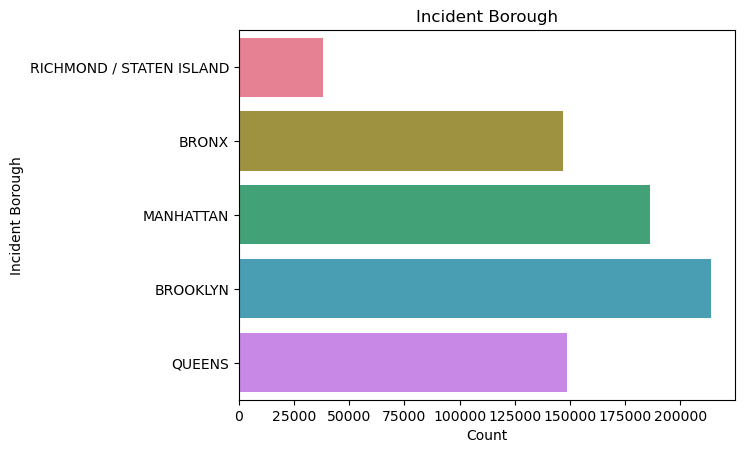

In [34]:
# Plot data onto countplot with titles/ labels and palette
sns.countplot(y="INCIDENT_BOROUGH", data=df4, palette="husl").set_title("Incident Borough")
plt.xlabel('Count')
plt.ylabel('Incident Borough')
# show plot
plt.show()

We can see that the highest and lowest count are in line with borough population (Brooklyn has the highest and Richmond/ Staten Island has the lowest). Given time I would like to examine how these proportions vary against one another.

In [35]:
# Import the one hot encoder from sklearn
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# Fit the OneHotEncoder to the column
# It expects a 2D array, so we first convert the column into a DataFrame
incident_borough_ohe = pd.DataFrame(df4['INCIDENT_BOROUGH'])
# fit and transform the data
incident_borough_encoded = ohe.fit_transform(incident_borough_ohe)
incident_borough_encoded

<734021x5 sparse matrix of type '<class 'numpy.float64'>'
	with 734021 stored elements in Compressed Sparse Row format>

In [36]:
# Convert from sparse matrix to dense array
dense_array_borough = incident_borough_encoded.toarray()
dense_array_borough

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [37]:
# Check that it has correctly identified the five boroughs
ohe.categories_

[array(['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS',
        'RICHMOND / STATEN ISLAND'], dtype=object)]

In [38]:
# It correctly identified the boroughs so now put into a dataframe to get column names
dense_array_df = pd.DataFrame(dense_array_borough, columns=ohe.categories_, dtype=int)

# Show the df
dense_array_df.head()

,BRONX,BROOKLYN,MANHATTAN,QUEENS,RICHMOND / STATEN ISLAND
0,0,0,0,0,1
1,0,0,0,0,1
2,1,0,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0


In [39]:
# Check for na's
dense_array_df.isna().sum()

BRONX                       0
BROOKLYN                    0
MANHATTAN                   0
QUEENS                      0
RICHMOND / STATEN ISLAND    0
dtype: int64

After checking that it is indeed working correctly I am going to one hot encode the remaining columns starting with `ALARM_SOURCE_DESCRIPTION_TX`.

#### One hot encode `ALARM_SOURCE_DESCRIPTION_TX`

First visualise the data before one hot encoding.

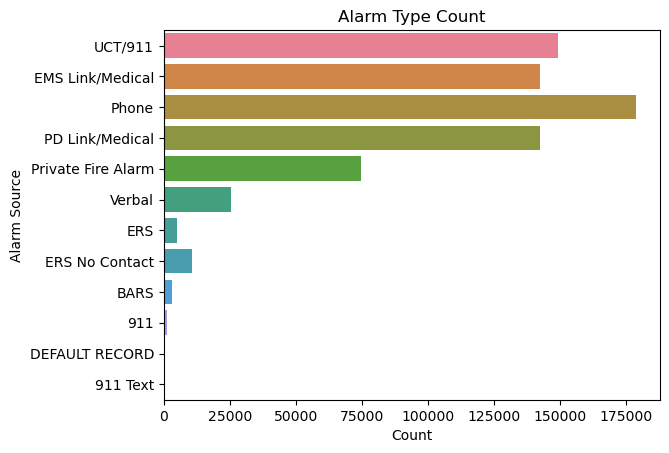

In [40]:
# Plot data onto countplot with titles/ labels and palette
sns.countplot(y="ALARM_SOURCE_DESCRIPTION_TX", data=df4, palette="husl").set_title("Alarm Type Count")
plt.xlabel('Count')
plt.ylabel('Alarm Source')
# Show plot
plt.show()

We can see that calling through 'Phone' and 'UCT/911' together dominate the data together. Perhaps if they are correlated with the target variable (travel time) we could improve these services to improve travel time.

In [41]:
# Fit the OneHotEncoder to the column and transform
# It expects a 2D array, so we first convert the column into a DataFrame
alarm_source_ohe = pd.DataFrame(df4['ALARM_SOURCE_DESCRIPTION_TX'])
alarm_source_encoded = ohe.fit_transform(alarm_source_ohe)
alarm_source_encoded

# Convert from sparse matrix to dense
dense_array_alarm_source = alarm_source_encoded.toarray()
dense_array_alarm_source

ohe.categories_

# Put into a dataframe to get column names
alarm_source_dense_array_df = pd.DataFrame(dense_array_alarm_source, columns=ohe.categories_, dtype=int)

# Show
alarm_source_dense_array_df.head()


,911,911 Text,BARS,DEFAULT RECORD,EMS Link/Medical,ERS,ERS No Contact,PD Link/Medical,Phone,Private Fire Alarm,UCT/911,Verbal
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0


#### One hot encode `HIGHEST_ALARM_LEVEL`


First show the count of the different categories in the variable as a seaborn countplot.

In [42]:
df4.shape

(734021, 10)

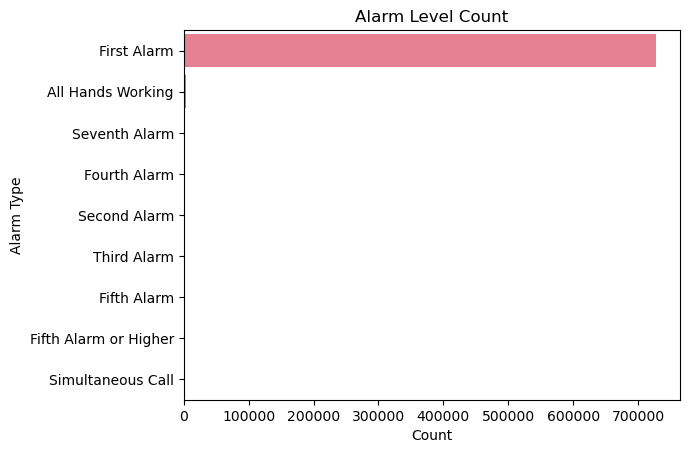

In [43]:
# Plot data onto countplot with titles/ labels and palette
sns.countplot(y="HIGHEST_ALARM_LEVEL", data=df4, palette="husl").set_title("Alarm Level Count")
plt.xlabel('Count')
plt.ylabel('Alarm Type')
# Show plot
plt.show()

From the bar chart above we can see over 700,000 counts were of the *First Alarm* kind (it is a response to a normal-sized fire or incident). The dataset has 734,000 incidents and, as previously seen, the first alarm covers 99% of incidents. Now I shall move on to one hot encode the column below.

In [44]:
# Fit the OneHotEncoder to the column and transform
# It expects a 2D array, so we first convert the column into a DataFrame
highest_alarm_ohe = pd.DataFrame(df4['HIGHEST_ALARM_LEVEL'])
highest_alarm_encoded = ohe.fit_transform(highest_alarm_ohe)
highest_alarm_encoded

# Convert from sparse matrix to dense
dense_array_highest_alarm = highest_alarm_encoded.toarray()
dense_array_highest_alarm

# Check the categories
ohe.categories_

# Put into a dataframe to get column names
highest_alarm_dense_array_df = pd.DataFrame(dense_array_highest_alarm, columns=ohe.categories_, dtype=int)

# Show
highest_alarm_dense_array_df.head()

,All Hands Working,Fifth Alarm,Fifth Alarm or Higher,First Alarm,Fourth Alarm,Second Alarm,Seventh Alarm,Simultaneous Call,Third Alarm
0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0


#### One hot encode `INCIDENT_CLASSIFICATION_GROUP`

Visualise the column before one hot encoding.

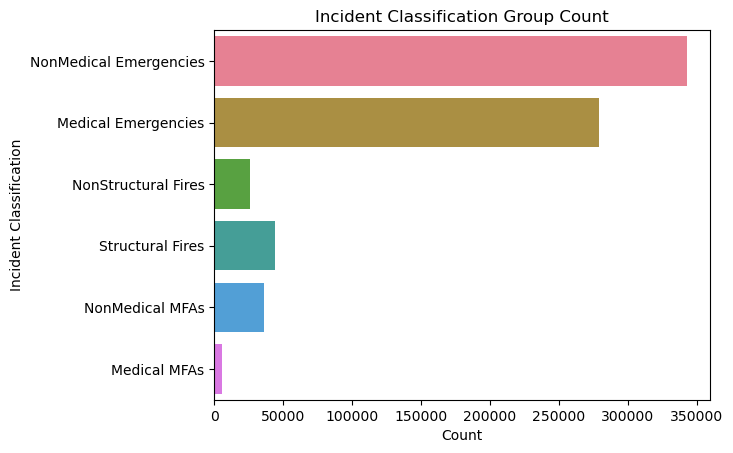

In [45]:
# Plot data onto countplot with titles/ labels and palette
sns.countplot(y="INCIDENT_CLASSIFICATION_GROUP", data=df4, palette="husl").set_title("Incident Classification Group Count")
plt.xlabel('Count')
plt.ylabel('Incident Classification')
# Show plot
plt.show()

We can see that non-medical emergencies take the highest proportion, but medical emergencies are not far behind. This emphasises the need to work smoothly with the medical/ambulance services, and to give staff repeated and in-date first aid certificates. Given time, I would like to examine the relationship between the fire and ambulance services: how much it effects travel time, and- if it does- how we can improve the relationship between the two services.

In [46]:
# Fit the OneHotEncoder to the column and transform
# It expects a 2D array, so we first convert the column into a DataFrame
incident_classification_ohe = pd.DataFrame(df4['INCIDENT_CLASSIFICATION_GROUP'])
incident_classification_encoded = ohe.fit_transform(incident_classification_ohe)
incident_classification_encoded

# Convert from sparse matrix to dense
dense_array_incident_classification = incident_classification_encoded.toarray()
dense_array_incident_classification

ohe.categories_

# Put into a dataframe to get column names
incident_classification_dense_array_df = pd.DataFrame(dense_array_incident_classification,\
                                                      columns=ohe.categories_, dtype=int)

# Show
incident_classification_dense_array_df.head()

,Medical Emergencies,Medical MFAs,NonMedical Emergencies,NonMedical MFAs,NonStructural Fires,Structural Fires
0,0,0,1,0,0,0
1,1,0,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,1,0,0,0,0,0


#### One hot encode `VALID_INCIDENT_RSPNS_TIME_INDC`

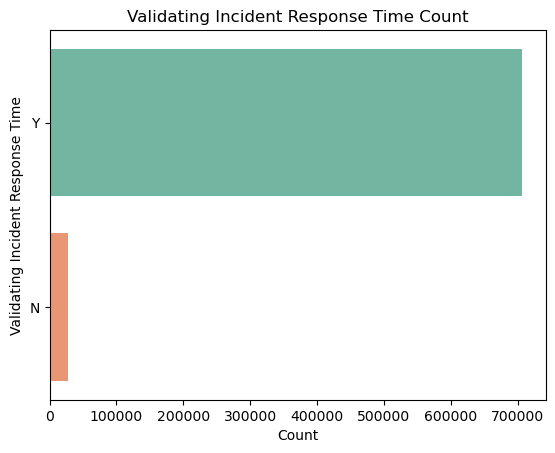

In [47]:
# Plot data onto countplot with titles/ labels and palette
sns.countplot(y="VALID_INCIDENT_RSPNS_TIME_INDC", data=df4, palette="Set2").set_title("Validating Incident Response Time Count")
plt.xlabel('Count')
plt.ylabel('Validating Incident Response Time')
# Show plot
plt.show()

Clearly the fire service has instilled a sense that the incident response time must be validated, as it is overwhelming in the yes category, in comparison to the column `VALID_DISPATCH_RESPONSE_TIME`, which is all not validated. We could look at how they encouraged validation of this time, and employ similar methods when new practices are introduced.

In [48]:
# Fit the OneHotEncoder to the column and transform
# It expects a 2D array, so we first convert the column into a DataFrame
valid_incident_ohe = pd.DataFrame(df4['VALID_INCIDENT_RSPNS_TIME_INDC'])
valid_incident_encoded = ohe.fit_transform(valid_incident_ohe)
valid_incident_encoded

# Convert from sparse matrix to dense
dense_array_valid_incident = valid_incident_encoded.toarray()
dense_array_valid_incident

ohe.categories_

# Put into a dataframe to get column names
valid_incident_dense_array_df = pd.DataFrame(dense_array_valid_incident, columns=ohe.categories_, dtype=int)

# Show
valid_incident_dense_array_df.head()

,N,Y
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [49]:
# The column names are not informative so I will change them to more informative names
valid_incident_dense_array_df.rename(columns={'N': 'VALID_INCIDENT_RSPNS_TIME_INDC_NO',\
                                              'Y': 'VALID_INCIDENT_RSPNS_TIME_INDC_YES'}, inplace=True)

In [50]:
# Check the change has been made in the dataframe head
valid_incident_dense_array_df.head()

,VALID_INCIDENT_RSPNS_TIME_INDC_NO,VALID_INCIDENT_RSPNS_TIME_INDC_YES
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [51]:
# Check dimensions for OHE dataframes for mistakes
print(df4.shape, incident_classification_dense_array_df.shape, highest_alarm_dense_array_df.shape,\
      valid_incident_dense_array_df.shape, alarm_source_dense_array_df.shape)

(734021, 10) (734021, 6) (734021, 9) (734021, 2) (734021, 12)


Having checked the dimenstions of the one hot encoded dfs match the original dataframe, I will now join them together.

## 6. Concatenating one hot encoded dataframe and original dataframe

In [52]:
# Concatenate the one hot encoded dataframes
df_ohe = pd.concat([dense_array_df, incident_classification_dense_array_df, highest_alarm_dense_array_df,\
      valid_incident_dense_array_df, alarm_source_dense_array_df], axis=1)

In [53]:
# Check the one hot encoded dataframe
df_ohe.head()

,BRONX,BROOKLYN,MANHATTAN,QUEENS,RICHMOND / STATEN ISLAND,Medical Emergencies,Medical MFAs,NonMedical Emergencies,NonMedical MFAs,NonStructural Fires,Structural Fires,All Hands Working,Fifth Alarm,Fifth Alarm or Higher,First Alarm,Fourth Alarm,Second Alarm,Seventh Alarm,Simultaneous Call,Third Alarm,VALID_INCIDENT_RSPNS_TIME_INDC_NO,VALID_INCIDENT_RSPNS_TIME_INDC_YES,911,911 Text,BARS,DEFAULT RECORD,EMS Link/Medical,ERS,ERS No Contact,PD Link/Medical,Phone,Private Fire Alarm,UCT/911,Verbal
0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [54]:
# Concatonate the one hot encoded dataframe to the main dataframe
df_ohe_2 = pd.concat([df4, df_ohe], axis=1)

In [55]:
# Check the dataframe head
df_ohe_2.head()

,STARFIRE_INCIDENT_ID,INCIDENT_DATETIME,INCIDENT_BOROUGH,ALARM_SOURCE_DESCRIPTION_TX,HIGHEST_ALARM_LEVEL,INCIDENT_CLASSIFICATION_GROUP,DISPATCH_RESPONSE_SECONDS_QY,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,"(BRONX,)","(BROOKLYN,)","(MANHATTAN,)","(QUEENS,)","(RICHMOND / STATEN ISLAND,)","(Medical Emergencies,)","(Medical MFAs,)","(NonMedical Emergencies,)","(NonMedical MFAs,)","(NonStructural Fires,)","(Structural Fires,)","(All Hands Working,)","(Fifth Alarm,)","(Fifth Alarm or Higher,)","(First Alarm,)","(Fourth Alarm,)","(Second Alarm,)","(Seventh Alarm,)","(Simultaneous Call,)","(Third Alarm,)","(VALID_INCIDENT_RSPNS_TIME_INDC_NO,)","(VALID_INCIDENT_RSPNS_TIME_INDC_YES,)","(911,)","(911 Text,)","(BARS,)","(DEFAULT RECORD,)","(EMS Link/Medical,)","(ERS,)","(ERS No Contact,)","(PD Link/Medical,)","(Phone,)","(Private Fire Alarm,)","(UCT/911,)","(Verbal,)"
0,1.431849e+15,2014-11-14 05:03:30,RICHMOND / STATEN ISLAND,UCT/911,First Alarm,NonMedical Emergencies,59,Y,345,286,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,1.522210e+15,2015-08-10 16:38:11,RICHMOND / STATEN ISLAND,EMS Link/Medical,First Alarm,Medical Emergencies,10,Y,93,83,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,1.936425e+15,2019-12-30 16:25:38,BRONX,Phone,First Alarm,NonMedical Emergencies,36,Y,423,387,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,1.400814e+15,2014-01-08 08:13:36,MANHATTAN,Phone,First Alarm,NonMedical Emergencies,28,Y,546,518,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,6.049091e+14,2006-02-18 21:05:46,BROOKLYN,PD Link/Medical,First Alarm,Medical Emergencies,6,Y,222,216,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


## 7. Extracting Season from the Incident Datetime column

In [56]:
# Create function for seasons
def season(month_of_year):
    if 3 <= month_of_year < 6: return 'Spring'
    if 6 <= month_of_year < 9: return 'Summer'
    if 9 <= month_of_year < 12: return 'Autumn'
    return 'Winter'

In [57]:
# Make a season column using the function made and dt.month
df_ohe_2['Season'] = [season(dt.month) for dt in df_ohe_2['INCIDENT_DATETIME']]

In [58]:
# Check it has worked
df_ohe_2.head()

,STARFIRE_INCIDENT_ID,INCIDENT_DATETIME,INCIDENT_BOROUGH,ALARM_SOURCE_DESCRIPTION_TX,HIGHEST_ALARM_LEVEL,INCIDENT_CLASSIFICATION_GROUP,DISPATCH_RESPONSE_SECONDS_QY,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,"(BRONX,)","(BROOKLYN,)","(MANHATTAN,)","(QUEENS,)","(RICHMOND / STATEN ISLAND,)","(Medical Emergencies,)","(Medical MFAs,)","(NonMedical Emergencies,)","(NonMedical MFAs,)","(NonStructural Fires,)","(Structural Fires,)","(All Hands Working,)","(Fifth Alarm,)","(Fifth Alarm or Higher,)","(First Alarm,)","(Fourth Alarm,)","(Second Alarm,)","(Seventh Alarm,)","(Simultaneous Call,)","(Third Alarm,)","(VALID_INCIDENT_RSPNS_TIME_INDC_NO,)","(VALID_INCIDENT_RSPNS_TIME_INDC_YES,)","(911,)","(911 Text,)","(BARS,)","(DEFAULT RECORD,)","(EMS Link/Medical,)","(ERS,)","(ERS No Contact,)","(PD Link/Medical,)","(Phone,)","(Private Fire Alarm,)","(UCT/911,)","(Verbal,)",Season
0,1.431849e+15,2014-11-14 05:03:30,RICHMOND / STATEN ISLAND,UCT/911,First Alarm,NonMedical Emergencies,59,Y,345,286,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,Autumn
1,1.522210e+15,2015-08-10 16:38:11,RICHMOND / STATEN ISLAND,EMS Link/Medical,First Alarm,Medical Emergencies,10,Y,93,83,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,Summer
2,1.936425e+15,2019-12-30 16:25:38,BRONX,Phone,First Alarm,NonMedical Emergencies,36,Y,423,387,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,Winter
3,1.400814e+15,2014-01-08 08:13:36,MANHATTAN,Phone,First Alarm,NonMedical Emergencies,28,Y,546,518,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,Winter
4,6.049091e+14,2006-02-18 21:05:46,BROOKLYN,PD Link/Medical,First Alarm,Medical Emergencies,6,Y,222,216,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,Winter


Before One hot encoding the seasons I am going to visualise the data in a barplot, as I believe it will offer insight.

The Count plot shows the amount of incidents per season are very similar to one another.

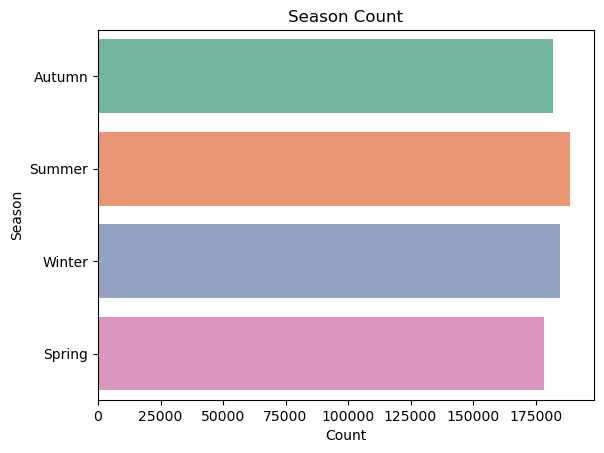

In [59]:
# Plot data onto countplot with titles/ labels and palette
sns.countplot(y="Season", data=df_ohe_2, palette="Set2").set_title("Season Count")
plt.xlabel('Count')
plt.ylabel('Season')
# show plot
plt.show()

## 8. One hot encode `Season`

In [60]:
# Fit the OneHotEncoder to the subcategory column and transform
# It expects a 2D array, so we first convert the column into a DataFrame
season_ohe = pd.DataFrame(df_ohe_2['Season'])
season_encoded = ohe.fit_transform(season_ohe)
season_encoded

# Convert from sparse matrix to dense
dense_array_season = season_encoded.toarray()
dense_array_season

ohe.categories_

# Put into a dataframe to get column names
season_dense_array_df = pd.DataFrame(dense_array_season, columns=ohe.categories_, dtype=int)

# Show
season_dense_array_df.head()

,Autumn,Spring,Summer,Winter
0,1,0,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


## 9. Final Dataframe

In [61]:
# Concatonate the one hot encoded season dataframe to the main dataframe
df_ohe_3 = pd.concat([df_ohe_2, season_dense_array_df], axis=1)

In [62]:
# Check the dataframe head
df_ohe_3.head()

,STARFIRE_INCIDENT_ID,INCIDENT_DATETIME,INCIDENT_BOROUGH,ALARM_SOURCE_DESCRIPTION_TX,HIGHEST_ALARM_LEVEL,INCIDENT_CLASSIFICATION_GROUP,DISPATCH_RESPONSE_SECONDS_QY,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,"(BRONX,)","(BROOKLYN,)","(MANHATTAN,)","(QUEENS,)","(RICHMOND / STATEN ISLAND,)","(Medical Emergencies,)","(Medical MFAs,)","(NonMedical Emergencies,)","(NonMedical MFAs,)","(NonStructural Fires,)","(Structural Fires,)","(All Hands Working,)","(Fifth Alarm,)","(Fifth Alarm or Higher,)","(First Alarm,)","(Fourth Alarm,)","(Second Alarm,)","(Seventh Alarm,)","(Simultaneous Call,)","(Third Alarm,)","(VALID_INCIDENT_RSPNS_TIME_INDC_NO,)","(VALID_INCIDENT_RSPNS_TIME_INDC_YES,)","(911,)","(911 Text,)","(BARS,)","(DEFAULT RECORD,)","(EMS Link/Medical,)","(ERS,)","(ERS No Contact,)","(PD Link/Medical,)","(Phone,)","(Private Fire Alarm,)","(UCT/911,)","(Verbal,)",Season,"(Autumn,)","(Spring,)","(Summer,)","(Winter,)"
0,1.431849e+15,2014-11-14 05:03:30,RICHMOND / STATEN ISLAND,UCT/911,First Alarm,NonMedical Emergencies,59,Y,345,286,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,Autumn,1,0,0,0
1,1.522210e+15,2015-08-10 16:38:11,RICHMOND / STATEN ISLAND,EMS Link/Medical,First Alarm,Medical Emergencies,10,Y,93,83,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,Summer,0,0,1,0
2,1.936425e+15,2019-12-30 16:25:38,BRONX,Phone,First Alarm,NonMedical Emergencies,36,Y,423,387,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,Winter,0,0,0,1
3,1.400814e+15,2014-01-08 08:13:36,MANHATTAN,Phone,First Alarm,NonMedical Emergencies,28,Y,546,518,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,Winter,0,0,0,1
4,6.049091e+14,2006-02-18 21:05:46,BROOKLYN,PD Link/Medical,First Alarm,Medical Emergencies,6,Y,222,216,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,Winter,0,0,0,1


In [63]:
# Convert column names that seem to be tuples into strings and remove string formatting of tuples using str.strip()
df_ohe_3.columns = [str(x).strip("(),'") for x in df_ohe_3.columns]

In [64]:
# Check the parenthesis, commas, and single quotation marks are removed
df_ohe_3.head()

,STARFIRE_INCIDENT_ID,INCIDENT_DATETIME,INCIDENT_BOROUGH,ALARM_SOURCE_DESCRIPTION_TX,HIGHEST_ALARM_LEVEL,INCIDENT_CLASSIFICATION_GROUP,DISPATCH_RESPONSE_SECONDS_QY,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,BRONX,BROOKLYN,MANHATTAN,QUEENS,RICHMOND / STATEN ISLAND,Medical Emergencies,Medical MFAs,NonMedical Emergencies,NonMedical MFAs,NonStructural Fires,Structural Fires,All Hands Working,Fifth Alarm,Fifth Alarm or Higher,First Alarm,Fourth Alarm,Second Alarm,Seventh Alarm,Simultaneous Call,Third Alarm,VALID_INCIDENT_RSPNS_TIME_INDC_NO,VALID_INCIDENT_RSPNS_TIME_INDC_YES,911,911 Text,BARS,DEFAULT RECORD,EMS Link/Medical,ERS,ERS No Contact,PD Link/Medical,Phone,Private Fire Alarm,UCT/911,Verbal,Season,Autumn,Spring,Summer,Winter
0,1.431849e+15,2014-11-14 05:03:30,RICHMOND / STATEN ISLAND,UCT/911,First Alarm,NonMedical Emergencies,59,Y,345,286,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,Autumn,1,0,0,0
1,1.522210e+15,2015-08-10 16:38:11,RICHMOND / STATEN ISLAND,EMS Link/Medical,First Alarm,Medical Emergencies,10,Y,93,83,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,Summer,0,0,1,0
2,1.936425e+15,2019-12-30 16:25:38,BRONX,Phone,First Alarm,NonMedical Emergencies,36,Y,423,387,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,Winter,0,0,0,1
3,1.400814e+15,2014-01-08 08:13:36,MANHATTAN,Phone,First Alarm,NonMedical Emergencies,28,Y,546,518,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,Winter,0,0,0,1
4,6.049091e+14,2006-02-18 21:05:46,BROOKLYN,PD Link/Medical,First Alarm,Medical Emergencies,6,Y,222,216,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,Winter,0,0,0,1


In [65]:
# Create the final dataframe
# Drop the original columns from which the one hot encoding ensued as well as the 'STARFIRE_INCIDENT_ID'
# 'STARFIRE_INCIDENT_ID' was dropped because it is a unique identifier of each incident that is not needed for modelling
final_df = df_ohe_3.drop(['STARFIRE_INCIDENT_ID','INCIDENT_DATETIME', 'INCIDENT_BOROUGH', \
                          'ALARM_SOURCE_DESCRIPTION_TX', 'HIGHEST_ALARM_LEVEL', \
                          'INCIDENT_CLASSIFICATION_GROUP', 'VALID_INCIDENT_RSPNS_TIME_INDC', 'Season'], axis=1)


- The column headers are now all strings (without parenthesis or apoststrophes in the column titles)

- The columns have succesfully been dropped

- The dataframe has been checked below and is now ready to be modelled upon

In [66]:
# Check final_df head
final_df.head()

,DISPATCH_RESPONSE_SECONDS_QY,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,BRONX,BROOKLYN,MANHATTAN,QUEENS,RICHMOND / STATEN ISLAND,Medical Emergencies,Medical MFAs,NonMedical Emergencies,NonMedical MFAs,NonStructural Fires,Structural Fires,All Hands Working,Fifth Alarm,Fifth Alarm or Higher,First Alarm,Fourth Alarm,Second Alarm,Seventh Alarm,Simultaneous Call,Third Alarm,VALID_INCIDENT_RSPNS_TIME_INDC_NO,VALID_INCIDENT_RSPNS_TIME_INDC_YES,911,911 Text,BARS,DEFAULT RECORD,EMS Link/Medical,ERS,ERS No Contact,PD Link/Medical,Phone,Private Fire Alarm,UCT/911,Verbal,Autumn,Spring,Summer,Winter
0,59,345,286,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,10,93,83,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,36,423,387,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,28,546,518,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,6,222,216,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [67]:
# Check the shape of final_df
final_df.shape

(734021, 41)

## 10. Correlation Matrix on a Heatmap

Before modelling data I wanted to check for multicolinearity.

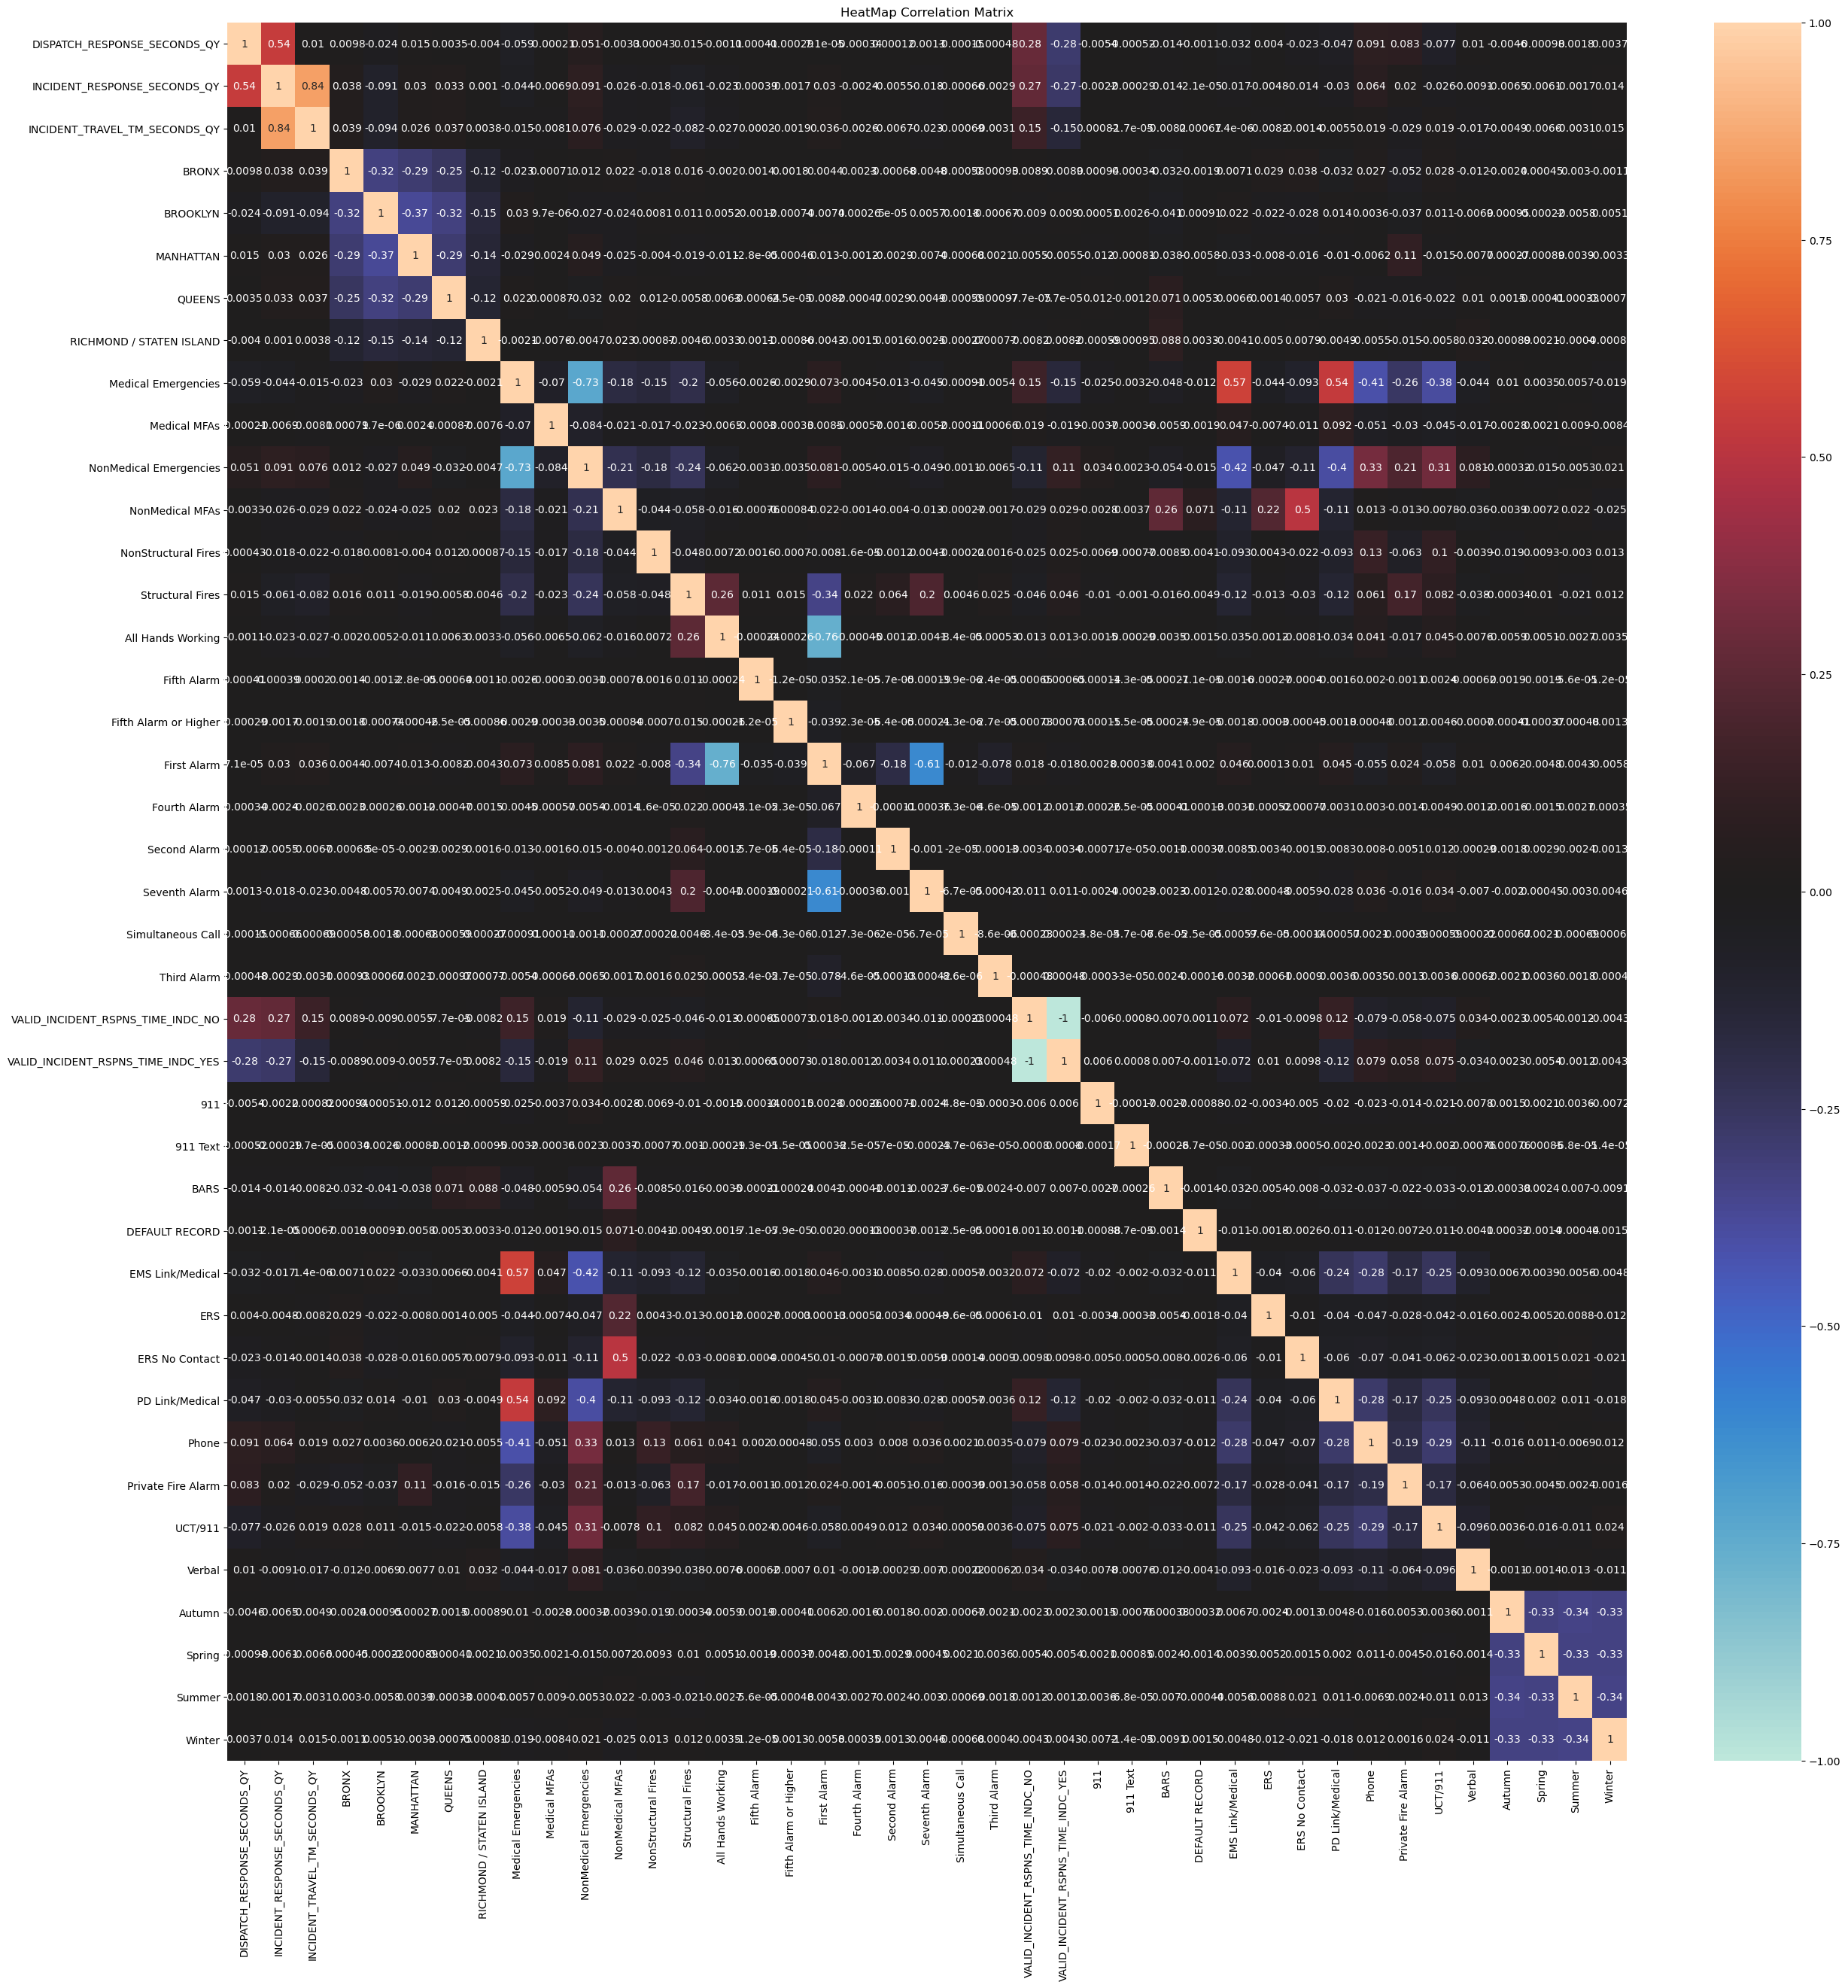

In [68]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(30,30))
sns.heatmap(final_df.corr(), annot=True, center=0, vmin=-1, vmax=1)
plt.title('HeatMap Correlation Matrix')
plt.show()

Viewing the heatmap above, there is high colinearity between the target variable `INCIDENT_TRAVEL_TM_SECONDS_QY` and `INCIDENT_RESPONSE_SECONDS_QY`. 

However, I have decided to keep the former variable after consulting the data description given. It is different enough to keep, the difference being that `INCIDENT_RESPONSE_SECONDS_QY` is the time elapsed from the very start (i.e. phone call) to getting to the scene with travel whilst `INCIDENT_TRAVEL_TM_SECONDS_QY` is purely travel time without taking into account when the incident was called in. It is also very important to judge how the time taken to call in an incident effects the target.

## 11. Modelling

In [69]:
# Assign the X and y variables for modelling and check the data points/ features.
y = final_df['INCIDENT_TRAVEL_TM_SECONDS_QY']
X = final_df.drop(columns='INCIDENT_TRAVEL_TM_SECONDS_QY')
print("There are", X.shape[0], 'data points, each with', X.shape[1], 'features.')

There are 734021 data points, each with 40 features.


#### Test and remainder split

In [70]:
# Taking a 20% test set first
X_remainder, X_test, y_remainder, y_test = \
    train_test_split(X, y, test_size = 0.2,
                     random_state=1)

In [71]:
print(f'Shape of remainder set: {X_remainder.shape}')
print(f'Shape of test set: {X_test.shape}')

Shape of remainder set: (587216, 40)
Shape of test set: (146805, 40)


#### Splitting the remainder into train and validation sets

In [72]:
# Splitting the remainder 80% into 15% validation and the remaining 65% as training data
X_train, X_validation, y_train, y_validation = \
    train_test_split(X_remainder, y_remainder, test_size = 0.15,
                     random_state=1)

In [73]:
print(f'Shape of test set: {X_test.shape}')
print(f'Shape of validation set: {X_validation.shape}')
print(f'Shape of train set: {X_train.shape}')

Shape of test set: (146805, 40)
Shape of validation set: (88083, 40)
Shape of train set: (499133, 40)


I can see that the validation and train set rows add up to the correct number: the remainder from the initial test split above. The columns are all the same, so it is safe to move on and start modelling the data.

## 12. Scaled Data

I will be involving scaled data and reviewing the differnece it makes, it is also essential to scale data for KNN models. Below I have created two differnt kinds of scaled data standard scaled and minmax scaled.

#### Standard Scaler

In [74]:
# Instantiate the standard scaler. 
scaler = StandardScaler()
# Scale data with the standard scaler
scaler.fit(X_remainder)

# Transform the data
X_remainder_scaled = scaler.transform(X_remainder)
X_test_scaled = scaler.transform(X_test)

#### Minmax Scaler

In [75]:
# Instantiate the minmax scaler. 
mm = MinMaxScaler()
# Scale data with the minmax scaler
mm.fit(X_remainder)

# Transform data
X_remainder_mm = mm.transform(X_remainder)
X_test_mm = mm.transform(X_test)

## 13. Linear Regression

#### Linear Regression without scaling

In [76]:
# Instantiate linear regression
lin_reg_model = LinearRegression()

# Fit to the train data
lin_reg_model.fit(X_remainder, y_remainder)

# Scoring model
acc_train = lin_reg_model.score(X_remainder, y_remainder)
acc_test = lin_reg_model.score(X_test, y_test)

# Print the score
print(f'Train result with scaling: {acc_train}')
print(f'Test result with scaling: {acc_test}')

Train result with scaling: 0.9999999013810142
Test result with scaling: 0.9999998816013541


The almost perfect 1 scores on the both train and test imply overfitting.

#### Cross Validate the model

In [77]:
# Import cross_val_score from sklearn
from sklearn.model_selection import cross_val_score

In [78]:
# Fit the model already instantiated above on 10 folds, I am choosing 10 as the dataset is large enough to do so.
# The variable "scores" will hold 10 accuracy scores, 
# each from a different train and validation split
scores = cross_val_score(lin_reg_model, X_remainder, y_remainder, cv = 10)
print(scores)

[0.99999923 0.99999965 1.         1.         1.         1.
 1.         1.         1.         0.99999987]


In [79]:
# Every score corresponds to a fold
for i in range(len(scores)) :
    print(f"Fold {i+1}: {scores[i]}")

Fold 1: 0.9999992310411802
Fold 2: 0.9999996538937163
Fold 3: 0.9999999999860557
Fold 4: 0.9999999999883205
Fold 5: 0.9999999999968995
Fold 6: 0.9999999999871513
Fold 7: 0.9999999999865802
Fold 8: 0.9999999999918556
Fold 9: 0.9999999999873938
Fold 10: 0.9999998668630604


Cross validation over the 10 folds reveals all folds are a near perfect 1.

#### Linear Regression with standard scaled data

In [80]:
# Instantiate linear regression
lin_reg_model_scaled = LinearRegression()

# Fit to the scaled train data
lin_reg_model_scaled.fit(X_remainder_scaled, y_remainder)

# Scoring model
acc_train_scaled = lin_reg_model_scaled.score(X_remainder_scaled, y_remainder)
acc_test_scaled = lin_reg_model_scaled.score(X_test_scaled, y_test)

# Print the score
print(f'Train result with scaling: {acc_train_scaled}')
print(f'Test result with scaling: {acc_test_scaled}')

Train result with scaling: 0.9999999013810087
Test result with scaling: 0.9999998816013743


The almost perfect 1 scores on the both train and test imply overfitting.

#### Cross Validate the standard scaled model

In [81]:
# Fit model on 10 folds.
# The variable "scores2" will hold 10 accuracy scores
# Each from a different train and validation split
scores2 = cross_val_score(lin_reg_model_scaled, X_remainder_scaled, y_remainder, cv = 10)
print(scores2)

[ 9.99999231e-01  9.99999654e-01  1.00000000e+00  1.00000000e+00
 -5.42324989e+14  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  9.99999867e-01]


In [82]:
# Every score corresponds to a fold
for i in range(len(scores2)) :
    print(f"Fold {i+1}: {scores2[i]}")

Fold 1: 0.9999992310414939
Fold 2: 0.9999996538947742
Fold 3: 0.9999999999859535
Fold 4: 0.9999999999881541
Fold 5: -542324988612396.94
Fold 6: 0.9999999999871143
Fold 7: 0.9999999999864779
Fold 8: 0.9999999999917979
Fold 9: 0.9999999999873039
Fold 10: 0.9999998668626578


Scaling the data does not make any significant difference in linear regression thus I will perform the next step without scaled data. However it is good to scale the data for evaluation purposes.

Of note fold 5 has returned a negative score whilst the remaining are almost a perfect 1.

## 14. Forward Stepwise Linear Regression

I am now going to perform forward step wise regression solely for the purpose of viewing which variables influence `INCIDENT_TRAVEL_TM_SECONDS_QY` the most, viewing the top 10 variables with 10 folds of cross validation, as mentioned above the dataset is large enough to be suitable for 10 folds.

In [83]:
# Using mlxtend.feature_selection, SequentialFeatureSelector 
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

# Instantiate model
step_lin_reg = LinearRegression()

# Build step forward feature selection with the top 10 feautres and 10 folds of cross validating with r2 score
sfs1 = sfs(step_lin_reg, k_features = 10, forward=True, floating=False, scoring='r2',cv=10)

# Perform SFFS
sfs1 = sfs1.fit(X_remainder, y_remainder)


In [84]:
# Check the top 10 variables that the model used
sfs1.subsets_

{1: {'feature_idx': (1,),
  'cv_scores': array([0.80556631, 0.71557683, 0.76178387, 0.77869794, 0.85697449,
         0.04177531, 0.74289405, 0.78963957, 0.43232215, 0.76253707]),
  'avg_score': 0.668776758548092,
  'feature_names': ('INCIDENT_RESPONSE_SECONDS_QY',)},
 2: {'feature_idx': (0, 1),
  'cv_scores': array([0.99999923, 0.99999965, 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.        , 0.99999987]),
  'avg_score': 0.999999875181371,
  'feature_names': ('DISPATCH_RESPONSE_SECONDS_QY',
   'INCIDENT_RESPONSE_SECONDS_QY')},
 3: {'feature_idx': (0, 1, 32),
  'cv_scores': array([0.99999923, 0.99999965, 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.        , 0.99999987]),
  'avg_score': 0.9999998751818742,
  'feature_names': ('DISPATCH_RESPONSE_SECONDS_QY',
   'INCIDENT_RESPONSE_SECONDS_QY',
   'Phone')},
 4: {'feature_idx': (0, 1, 32, 38),
  'cv_scores': array([0.99999923, 0.99999965, 1.        , 1.        , 1

The variables that have the most impact on the target variable `INCIDENT_TRAVEL_TM_SECONDS_QY`:

1. `INCIDENT_RESPONSE_SECONDS_QY` , the elapsed time between incident datetime and first on scene datetime

2. `DISPATCH_RESPONSE_SECONDS_QY`,  the elapsed time between incident datetime and the fist unit datetime (when the unit is assigned)

3. `Phone`, the phone as the source of the alarm

4. `Summer`, the summer season 

5. `Autumn`, the autumn/ fall season

6. `QUEENS`, the Queens Borough

7. `RICHMOND / STATEN ISLAND`, the Richmond/ Staten Island borough

8. `NonMedical MFAs`, multiple factor analysis of a non medical kind

9. `Seventh Alarm`, the seventh alarm level

10. `BARS`, bars calling as the source of alarm

- Bars being a source of the alarm that is correlated with the target variable here (10th) suggests with further exploration we can explore what is causing bars to call and how we can improve safety at bars.
- The season Summer followed by Autumn (4th and 5th respectively) have more of an effect on travel time than the remaining seasons, though the seasons all have a similiar count of incidents- winter and autumn the count is very similar yet winter is not one of the variables in the top 10. Given time I would like to explore this further such as are there specific kinds of emergencies that are more present in summer and autumn? And can we prevent to some extent them by identifying them?

#### Checking New York Population to examine the boroughs that have appeared above
Google search New York city borough population using cencus data (https://www.citypopulation.de/en/usa/newyorkcity/)

In [85]:
# View the percentage of New York population by borough

ny_pop = 8804190

brooklyn_pop = round(2736074/8804190, 2)

bronx_pop = round(1472654/8804190, 2)

manhattan_pop = round(1694251/8804190, 2)

queens_pop = round(2405464/8804190, 2)

staten_pop = round(495747/8804190, 2)

print(f'Brooklyn is {brooklyn_pop}% of the New York Population')
print(f'Bronx is {bronx_pop}% of the New York Population')
print(f'Manhattan is {manhattan_pop}% of the New York Population')
print(f'Queens is {queens_pop}% of the New York Population')
print(f'Richmond/ Staten Island is {staten_pop}% of the New York Population')


Brooklyn is 0.31% of the New York Population
Bronx is 0.17% of the New York Population
Manhattan is 0.19% of the New York Population
Queens is 0.27% of the New York Population
Richmond/ Staten Island is 0.06% of the New York Population


In the stepwise regression we see that the borough Queens is the sixth variable that most affects travel time (target variable) followed by Richmond/ Staten Island in seventh place.

By viewing the population percentages of these boroughs we can see that Queens has the second highest population borough at 27% whilst Richmond/ Staten Island is a mere 6% of the data. The latter is a curiosity especially since it has such a small population compared to the remaining boroughs, both boroughs could explored further to explain why they affect travel time moreso than the remaining boroughs. I could use the location columns that show interest in the boroughs politics, police, and district to name a few to explore this concept further.

## 15. Ridge and Lasso Regression

Below is ridge and lasso type linear regression models.

In [86]:
# Import the estimators
from sklearn.linear_model import Lasso, Ridge

### Lasso Model
# 1. Instantiate
mylasso = Lasso()

# 2. Fit the lasso model
mylasso.fit(X_remainder, y_remainder)

# 3. Score the lasso model
print(mylasso.score(X_test, y_test))

### Ridge Model
# 1. Instantiate
myridge = Ridge()

# 2. Fit the ridge model
myridge.fit(X_remainder, y_remainder)

# 3. Score the ridge model
print(myridge.score(X_test, y_test))

0.9999998703424592
0.999999881601356


In [87]:
# Coefficients for Lasso
mylasso.coef_

array([-0.99983196,  0.99993408,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ])

In [88]:
# Coefficients for Ridge
myridge.coef_

array([-9.99999975e-01,  1.00000007e+00, -2.98842173e-04,  6.42897475e-05,
       -1.66926946e-05,  1.26895543e-04,  1.24321061e-04,  3.36197874e-04,
        3.37170287e-04,  3.13757726e-04,  3.66243840e-04, -5.29828311e-04,
       -8.23543732e-04, -3.39178823e-03,  3.98926318e-04,  6.08097100e-04,
       -4.95742799e-04,  5.02600212e-04,  6.27796335e-04,  6.35198918e-04,
        4.83137033e-04,  6.31770860e-04,  6.64271094e-06, -6.64177961e-06,
        4.93607902e-06,  8.44519610e-05, -1.55711076e-04, -4.78329634e-05,
        2.87805159e-06,  9.16771512e-05,  3.36855023e-07, -1.12306915e-05,
       -2.67154465e-04,  2.26834234e-05,  2.34031210e-04,  4.09300108e-05,
        1.27683752e-04, -9.96790966e-05,  1.29532991e-04, -1.57584621e-04])

Ridge regression applies to all the feautres of the data but shrinks the coeffecients. The coeffecients are very small compared to lasso regression. Taking account of the forward stepwise linear regression and the coeffeicents given in the lasso regression we can see that it only retains two variables from the whole dataset.

The results for both ridge and lasso regression are very similar to those of the linear regression models shown in part 13. It was worth trying to view the scores but will stop here as they are not giving different results.

## 16. Decision Tree Model

Below is a decision tree model.

In [89]:
# Instantiate the decsion tree model
my_tree = DecisionTreeClassifier()

# Fit the model
my_tree.fit(X_train,y_train)

# Score the model
train_acc = my_tree.score(X_remainder,y_remainder)
test_acc = my_tree.score(X_test,y_test)

# Print the scores
print('Train_accuracy')
print(my_tree.score(X_remainder, y_remainder))
print('Test_accuracy')
print(my_tree.score(X_test, y_test))

Train_accuracy
0.9849442113293916
Test_accuracy
0.8975443615680665


Now finding the optimal max tree depth using the train and validation sets.

In [90]:
# Empty list for validation and train scores
train_accs = []
test_accs = []

# Range from 1-20 max_depth values
for i in range(1,20):
    
   
    # fit range onto decision tree classifier
    my_dt = DecisionTreeClassifier(max_depth=i)
    #fit onto train sets
    my_dt.fit(X_train,y_train)
    
    # score
    train_accs.append(my_dt.score(X_train,y_train))
    test_accs.append(my_dt.score(X_validation,y_validation))

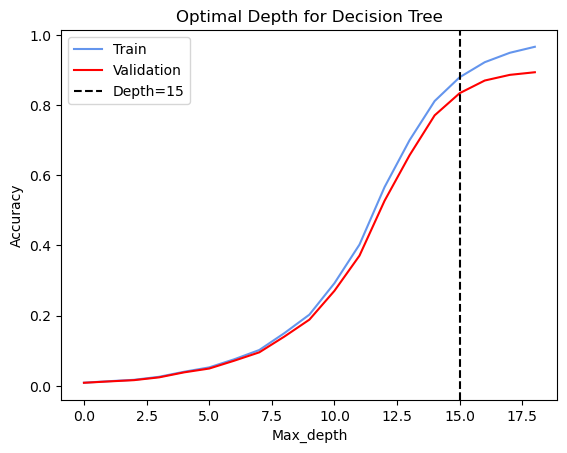

In [91]:
# Plot the range of max_depth values
plt.figure()
plt.plot(train_accs,c='cornflowerblue',label='Train')
plt.plot(test_accs,c='red',label='Validation')
plt.axvline(15, c='black', linestyle='--', label='Depth=15')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.title('Optimal Depth for Decision Tree')
plt.legend()
plt.show()

Looking at the above graph I am choosing the max depth as 15, the data is very overfit until around 9 but the accuracy increases greatly thereafter with the train and validation still being fairly close together. After the 15 max depth the lines start to diverge from one another more greatly thus widening the gap between the acuracy of the sets which is not ideal.

In [92]:
# Instantiate decision tree with max depth 15
my_tree = DecisionTreeClassifier(max_depth=15)
my_tree.fit(X_remainder, y_remainder)

# Score it on the data
train_acc2 = my_tree.score(X_remainder, y_remainder)
test_acc2 = my_tree.score(X_test, y_test)

# Print the scores
print('Train_accuracy')
print(my_tree.score(X_remainder, y_remainder))
print('Test_accuracy')
print(my_tree.score(X_test, y_test))

Train_accuracy
0.8082920083921419
Test_accuracy
0.7668880487721808


By employing the optimal max depth of 15 I have gained a good train and test accuracy of ~81% for the train data and ~77% for the test data.

### Scaled Decision Tree Model

#### Standard scaler

In [93]:
# Instantiate decision tree with max depth 15
my_tree = DecisionTreeClassifier(max_depth=15)
my_tree.fit(X_remainder_scaled, y_remainder)

# Score it on the data
train_acc2 = my_tree.score(X_remainder_scaled, y_remainder)
test_acc2 = my_tree.score(X_test_scaled, y_test)

# Print the scores
print('Train_accuracy')
print(my_tree.score(X_remainder_scaled, y_remainder))
print('Test_accuracy')
print(my_tree.score(X_test_scaled, y_test))

Train_accuracy
0.8082920083921419
Test_accuracy
0.7668880487721808


#### Minmax scaler

In [94]:
# Instantiate decision tree with max depth 15
my_tree = DecisionTreeClassifier(max_depth=15)
my_tree.fit(X_remainder_mm, y_remainder)

# Score it on the data
train_acc2 = my_tree.score(X_remainder_scaled, y_remainder)
test_acc2 = my_tree.score(X_test_mm, y_test)

# Print the scores
print('Train_accuracy')
print(my_tree.score(X_remainder_mm, y_remainder))
print('Test_accuracy')
print(my_tree.score(X_test_mm, y_test))

Train_accuracy
0.8082954142938884
Test_accuracy
0.7668676135009026


Scaling the decision tree model with either the standard or minmax scaler does not significantly effect the accuracy of the model, thus I will stick to the unscaled decsion tree model with optimum tree depth.

## 17. KNN Model

### First look at optimal PCA components

KNN is a very computationally expensive model therefore I am going to add PCA to reduce the dimensionality therefore making it less computationally expensive.

In [95]:
# Import PCA 
from sklearn.decomposition import PCA

# Instantiate PCA and fit the data
my_pca = PCA()
my_pca.fit(X_remainder)

# Transform data 
X_remainder_pca = my_pca.transform(X_remainder)
X_test_pca = my_pca.transform(X_test)

In [96]:
# Print the variance captured and the proportion of variance captured by PC1 and PC2
print(f"Variance captured by PC1: {my_pca.explained_variance_[0]: 0.3f}")
print(f"Variance captured by PC2: {my_pca.explained_variance_[1]: 0.3f}")

print(f"Proportion of variance captured by PC1: {my_pca.explained_variance_ratio_[0]: 0.3f}")
print(f"Proportion of variance captured by PC2: {my_pca.explained_variance_ratio_[1]: 0.3f}")

Variance captured by PC1:  51541.958
Variance captured by PC2:  8309.043
Proportion of variance captured by PC1:  0.861
Proportion of variance captured by PC2:  0.139


We can see that PC1 captures most of the variance itself at almost 86% as demonstrated below the cumulative variance captured by PC1 and PC2 is over 99%.

In [97]:
# Observe the cumulative sum as each PC is added
my_pca.explained_variance_ratio_.cumsum()

array([0.86112759, 0.99994937, 0.99995902, 0.99996361, 0.99996787,
       0.99997204, 0.99997614, 0.99997999, 0.99998366, 0.99998707,
       0.99999027, 0.99999242, 0.99999444, 0.99999549, 0.99999652,
       0.9999975 , 0.99999817, 0.99999881, 0.9999992 , 0.99999939,
       0.99999957, 0.99999971, 0.99999982, 0.99999989, 0.99999995,
       0.99999998, 0.99999999, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

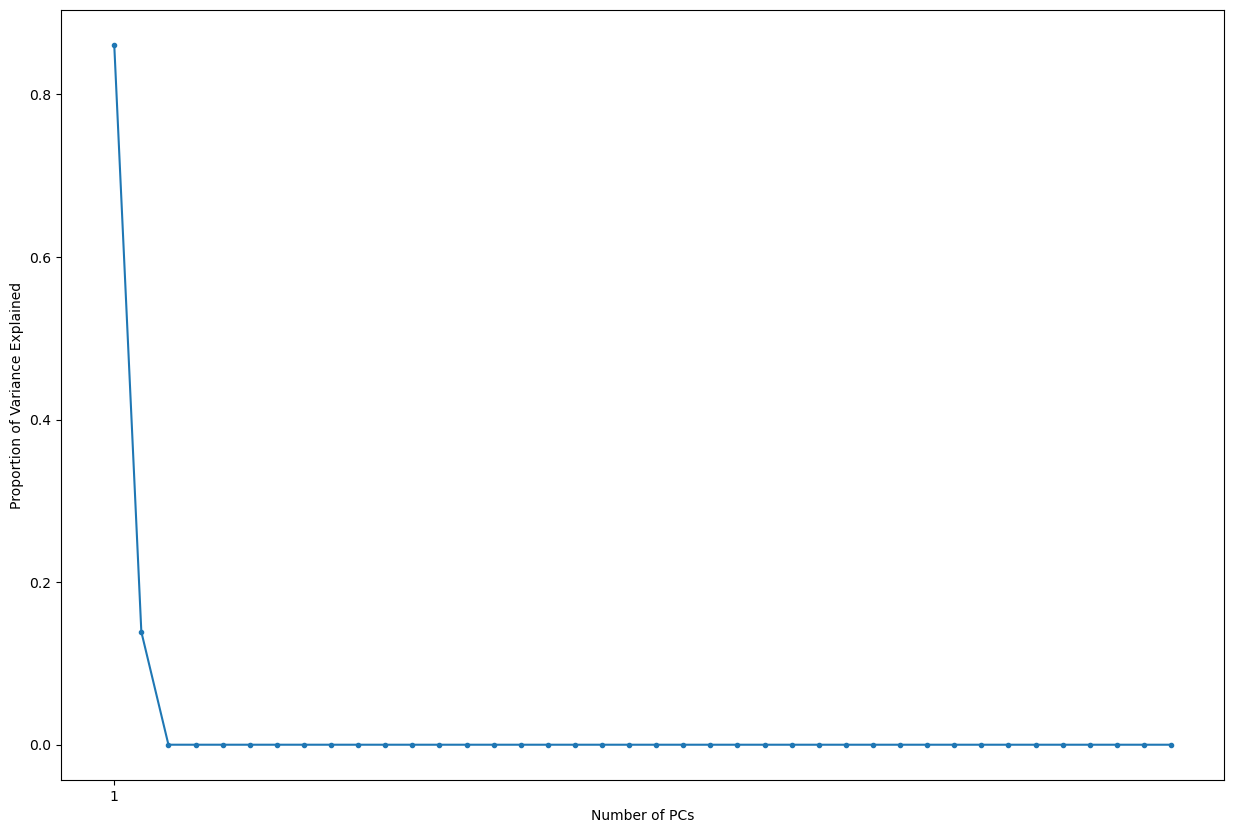

In [98]:
# Add the variance ratio to a variable, use it to plot a scree graph to look for the 'elbow' point and confirm findings
expl_var = my_pca.explained_variance_ratio_

# Plot graph
plt.figure(figsize=(15, 10))
plt.plot(range(1,41),expl_var,marker='.')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1,10,40))
plt.show()

Using the 'elbow' of the screeplot above and the cumulative sum we can see inform us the 3 PC's give us the optimal variance of approximately 99%.

### KNN with PCA and standard scaler

In [99]:
# Fit the data to the 3 components and fit the standard scaled data to it
my_pca = PCA(n_components = 3)
my_pca.fit(X_remainder_scaled)

# Transform the scaled data with PCA
X_remainder_pca = my_pca.transform(X_remainder_scaled)
X_test_pca = my_pca.transform(X_test_scaled)

In [100]:
# Instantiate the model
my_knn = KNeighborsClassifier()

# Fit it to the data with PCA and standard scaler
my_knn.fit(X_remainder_pca, y_remainder)

# Score the model 
test_predictions = my_knn.predict(X_test_pca)
test_accuracy = accuracy_score(test_predictions, y_test)
train_accuracy = my_knn.score(X_remainder_pca,y_remainder)

print(f"Test accuracy: {test_accuracy}")
print(f"Train accuracy: {train_accuracy}")


Test accuracy: 0.1737406764074793
Train accuracy: 0.39830317974987056


The results from the KNN model are not great with train accuracy at approximately ~40% and test at ~17%.

### KNN with PCA and minmax scaler

In [101]:
# Fit the data to the 3 components and fit the minmax scaled data to it
my_pca_mm = PCA(n_components = 3)
my_pca_mm.fit(X_remainder_mm)

# Transform the scaled data with PCA
X_remainder_pca_mm = my_pca_mm.transform(X_remainder_mm)
X_test_pca_mm = my_pca_mm.transform(X_test_mm)

In [102]:
# Instantiate the model
my_knn = KNeighborsClassifier()

# Fit it to the data with PCA and standard scaler
my_knn.fit(X_remainder_pca_mm, y_remainder)

# Score the model 
test_predictions = my_knn.predict(X_test_pca_mm)
test_accuracy = accuracy_score(test_predictions, y_test)
train_accuracy = my_knn.score(X_remainder_pca_mm,y_remainder)

print(f"Test accuracy: {test_accuracy}")
print(f"Train accuracy: {train_accuracy}")

Test accuracy: 0.18414222948809644
Train accuracy: 0.41017104438571156


The minmax scaling with PCA improved the train and test accuracy very slightly (approximately 1% each).

The base KNN models (with the different scaler types) with the optimum components (which reduces dimensionality), have given me subpar results compared to the base models for the linear regression and the decision tree model. Thus I am going to stop evaluating the KNN model, it is very computationally expensive to find a K value when the base model/s are not promising at all. 

## 18. Examining the Target Variable `INCIDENT_TRAVEL_TM_SECONDS_QY`

Before evaluating the models I would like to explore the target variable `INCIDENT_TRAVEL_TM_SECONDS_QY` by looking at the extreme and average values.

In [103]:
# The mean time for the target/ y variable ('INCIDENT_TRAVEL_TM_SECONDS_QY')
mean = final_df['INCIDENT_TRAVEL_TM_SECONDS_QY'].mean()
mean

269.4870024154622

In [104]:
# The median time for the target/ y variable ('INCIDENT_TRAVEL_TM_SECONDS_QY')
median = final_df['INCIDENT_TRAVEL_TM_SECONDS_QY'].median()
median

245.0

In [105]:
# The mode time for the target/ y variable ('INCIDENT_TRAVEL_TM_SECONDS_QY')
mode = final_df['INCIDENT_TRAVEL_TM_SECONDS_QY'].mode()
mode

0    231
dtype: int64

In [106]:
# The min time for the target/ y variable ('INCIDENT_TRAVEL_TM_SECONDS_QY')
final_df['INCIDENT_TRAVEL_TM_SECONDS_QY'].min()

1

In [107]:
# The max time for the target/ y variable ('INCIDENT_TRAVEL_TM_SECONDS_QY')
final_df['INCIDENT_TRAVEL_TM_SECONDS_QY'].max()

70030

#### Findings of the target variable

-  The averages for `INCIDENT_TRAVEL_TM_SECONDS_QY` (mean ~269 seconds, median 245 seconds, and mode 231 seconds) are all relatively close.

-  The min (1 seconds) and max (70030 seconds) for `INCIDENT_TRAVEL_TM_SECONDS_QY` reveal there are extreme outliers here. 

-  The below histogram of the target variable `INCIDENT_TRAVEL_TM_SECONDS_QY` has been cut off at 1000 seconds as the tail end is very long reaching to the max 70030 seconds with minimal height. However, it does inform us there are  around 5000 incidents of outliers above 1000 seconds of the 734, 021 incidents given (~0.007% of the data).

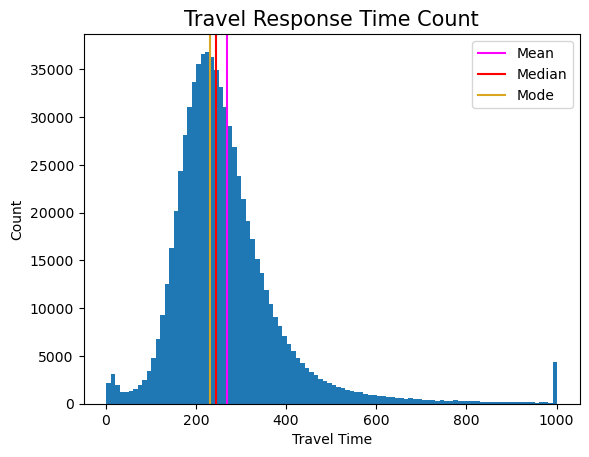

In [108]:
# Plot the count of travel time in histogram with mean, median, and mode lines, with bin partitions of 100 applied 
plt.figure()
plt.hist(np.clip(final_df['INCIDENT_TRAVEL_TM_SECONDS_QY'].values, 0, 1001), bins= 100)
plt.xlabel('Travel Time')
plt.ylabel('Count')
plt.title('Travel Response Time Count', fontsize= 15)
plt.axvline(final_df['INCIDENT_TRAVEL_TM_SECONDS_QY'].mean(), label = 'Mean', color ='magenta')
plt.axvline(final_df['INCIDENT_TRAVEL_TM_SECONDS_QY'].median(), label = 'Median', color ='red')
plt.axvline(final_df['INCIDENT_TRAVEL_TM_SECONDS_QY'].mode()[0], label = 'Mode', color ='goldenrod')
plt.legend()
plt.show()

## 19. Model Evaluation

### Evaluating the Linear Regression Model

#### Linear Regression Model Evaluation

In [109]:
# Fit model to data and then use predict function on test data
lin_reg_model.fit(X_remainder, y_remainder)
y_pred = lin_reg_model.predict(X_test)

In [110]:
# Import metrics from sklearn
from sklearn import metrics
# Print the Mean Absolute Error, Root Mean Squared Error, and R2 Score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.0004881137143885748
Root Mean Squared Error: 0.05380398219821666
R2 Score: 0.9999998816013541


The Mean absolute error is approximately ~0 (0 means the data is overfit). 

The Root Mean Squared Error (RMSE) is very sensitive to outliers it is 0.1 in this case,  does indicate high acuracy between the observed and predicted values.

The R squared is approximately 0.93, (a score of a perfect 1 would mean the model is overfit).

Taking all three scores into account, this model is not the best because it is overfit.

#### Scaled Linear Regression Model Evaluation

In [111]:
# Check if there's much difference in scaled data linear regression, fit the scaled model onto data
lin_reg_model_scaled.fit(X_remainder_scaled, y_remainder)
# Use predict function on test data
y_pred2 = lin_reg_model_scaled.predict(X_test_scaled)

In [112]:
# Print the Mean Absolute Error, Root Mean Squared Error, and R2 Score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))
print('R2 Score:', metrics.r2_score(y_test, y_pred2))

Mean Absolute Error: 0.0004895602578164448
Root Mean Squared Error: 0.053803977623065775
R2 Score: 0.9999998816013743


The results for the scaled linear regression are almost the same as the linear regression that is not scaled. The mean absolute error is very small, approximately 0 and R squared is aproximately 1; both of which mean the model overfit on the data. Scaled Linear Regression is not suiltable as the final model either.

### Evaluating the Decision Tree Model

In [113]:
# Fit decision tree model to data and then use predict function on test data
my_dt.fit(X_remainder, y_remainder)
y_pred3 = my_dt.predict(X_test)

In [114]:
# Print the Mean Absolute Error, Root Mean Squared Error, and R2 Score for decision tree model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))
print('R2 Score:', metrics.r2_score(y_test, y_pred3))

Mean Absolute Error: 1.2516126834917067
Root Mean Squared Error: 42.3812823491631
R2 Score: 0.9265374361662249


The mean absolute error is small at 1.3 but not 0 (0 implies overfitted data), but still approximately 1.3 seconds away from the true value travel time.

The RMSE is approximately 42.4. The mean for the dependent variable `INCIDENT_TRAVEL_TM_SECONDS_QY` being 269 seconds, means again the aproximate error of 16% (43/269). Again, this is not ideal but the RMSE is very sensitive to outliers, which we know are present in this dataset.


The R squared is approximately 0.93.

The Decision Tree Model is the best model to take forth to predict `INCIDENT_TRAVEL_TM_SECONDS_QY`.

## 20. Model Evaluation Conclusion

- In conclusion I would take the decision tree model forward as it has the most accurate scores on the train and test data without implying overfitting the data.

- The algorithm was not very accurate but can still make reasonably good predictions.

- There are many factors that may have contributed to this inaccuracy, such as:

1. Bad assumptions: I made the assumption that this data has a linear relationship, but that might not be the case, maybe I should have binned the target variable to make it categorical?

2. Poor features: The features I used may not have had a high enough correlation to the values I was trying to predict.